# ANN 2014-2023 APX market

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import minmax_scale, normalize
import seaborn as sn
import datetime
%matplotlib inline

In [2]:
#Importing Machine learning library

import tensorflow as ts

In [3]:
#Importing Machine learning library

from tensorflow import keras

In [4]:
#Creating file path to read file

csv_file_path ='Table2014_2023F.csv'

In [5]:
#Reading the csv file with reduced features and ready for the model and assigning variable name

Table=pd.read_csv(csv_file_path)

In [6]:
#Checking table attributes

Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157338 entries, 0 to 157337
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATETIME                        157338 non-null  object 
 1   System Buy Price(GBP/MWh)       157338 non-null  float64
 2   Market Index Price (£/MWh)      157338 non-null  float64
 3   Market Index Volume (MWh)       157338 non-null  float64
 4   Settlement Period               157338 non-null  int64  
 5   National demand (MW)            157338 non-null  float64
 6   Embbeded wind generation (MW)   157338 non-null  float64
 7   Embbeded solar generation (MW)  157338 non-null  float64
 8   Total system demand (MW)        157338 non-null  float64
 9   Wind generation (MW)            157338 non-null  float64
 10  Solar generation (MW)           157338 non-null  float64
 11  Hydro generation (MW)           157338 non-null  float64
 12  Biomass generati

In [7]:
#Creating a for loop to convert all columns from float64 to float32, to help machine handling computation

columns_to_convert=['National demand (MW)','Solar generation (MW)','Embbeded solar generation (MW)','Embbeded wind generation (MW)','Total system demand (MW)','Market Index Volume (MWh)','Market Index Price (£/MWh)','System Buy Price(GBP/MWh)','Wind generation (MW)','Hydro generation (MW)','Biomass generation (MW)' ]
for column in columns_to_convert:
  Table[column]=pd.to_numeric(Table[column],errors='coerce').astype('float32')

## ANN model

In [8]:
#Libriries needed for the model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separating the features and target variable
features = Table[['System Buy Price(GBP/MWh)','Market Index Volume (MWh)','Embbeded wind generation (MW)','Embbeded solar generation (MW)','Total system demand (MW)','Wind generation (MW)','Biomass generation (MW)','Solar generation (MW)','Hydro generation (MW)']]
target = Table['Market Index Price (£/MWh)']

# Performing data preprocessing
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Defining the model architecture
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=25, batch_size=12, verbose=1)

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')

Epoch 1/25
10490/10490 [==============================] - 49s 5ms/step - loss: 3686.0566
Epoch 2/25
10490/10490 [==============================] - 56s 5ms/step - loss: 1866.7589
Epoch 3/25
10490/10490 [==============================] - 65s 6ms/step - loss: 1657.9468
Epoch 4/25
10490/10490 [==============================] - 64s 6ms/step - loss: 1598.3237
Epoch 5/25
10490/10490 [==============================] - 71s 7ms/step - loss: 1562.7731
Epoch 6/25
10490/10490 [==============================] - 78s 7ms/step - loss: 1540.5363
Epoch 7/25
10490/10490 [==============================] - 43s 4ms/step - loss: 1529.6246
Epoch 8/25
10490/10490 [==============================] - 53s 5ms/step - loss: 1519.2140
Epoch 9/25
10490/10490 [==============================] - 64s 6ms/step - loss: 1511.8618
Epoch 10/25
10490/10490 [==============================] - 62s 6ms/step - loss: 1506.1277
Epoch 11/25
10490/10490 [==============================] - 73s 7ms/step - loss: 1500.6490
Epoch 12/25
10490/1

In [9]:
# Making predictions
predictions = model.predict(X_test)

984/984 [==============================] - 4s 4ms/step


In [10]:
loss

1632.420654296875

In [11]:
#Printing the predicted values to check for irregularities

print(predictions)

[[40.4983  ]
 [61.847374]
 [29.826197]
 ...
 [36.266144]
 [37.873825]
 [44.127163]]


In [12]:
#Checking the length of predictions

len(predictions)

31468

In [13]:
#Checking max of predictions to help set plot range

max(predictions)

array([705.4472], dtype=float32)

In [14]:
# Transforming the prediction array of 2d to one dimension for plotting

predictions1= predictions.reshape(-1)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) score: {r2}')

Mean Squared Error (MSE): 1632.422607421875
Root Mean Squared Error (RMSE): 40.40325164794922
Mean Absolute Error (MAE): 18.178842544555664
R-squared (R2) score: 0.6906021859780679


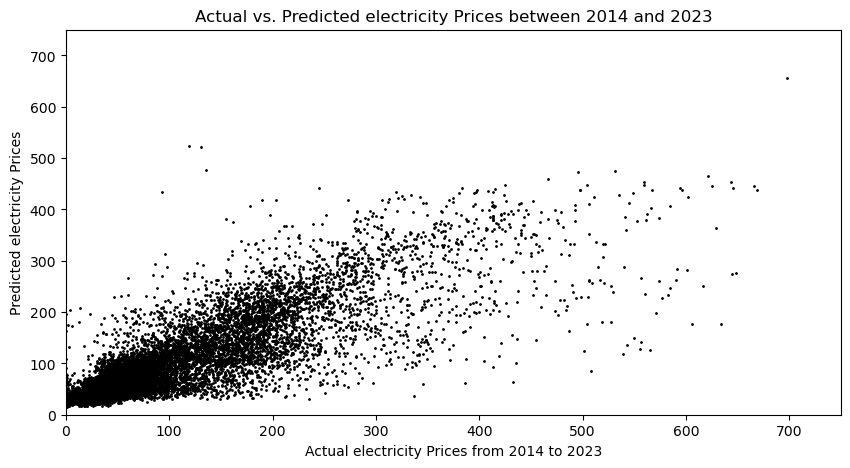

<Figure size 640x480 with 0 Axes>

In [16]:
#Importing library to calculate evalution metrics

import matplotlib.pyplot as plt

# Ploting predicted vs. actual prices
plt.figure(figsize=(10, 5))
plt.grid(False)
plt.scatter(y_test, predictions,color='black',s=1)
plt.xlabel('Actual electricity Prices from 2014 to 2023')
plt.ylabel('Predicted electricity Prices')
plt.title('Actual vs. Predicted electricity Prices between 2014 and 2023')
min_val = 0  
max_val = 750  
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()
plt.savefig("random.jpg", facecolor="k")

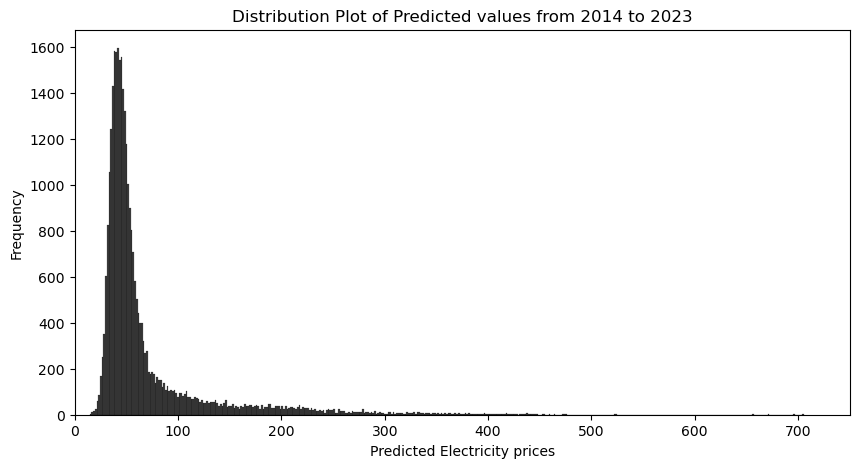

<Figure size 640x480 with 0 Axes>

In [17]:
#Potting distribution of predition

plt.figure(figsize=(10, 5))
plt.grid(False)
sn.histplot(predictions1, color='black')
plt.title('Distribution Plot of Predicted values from 2014 to 2023')
plt.xlabel('Predicted Electricity prices')
plt.ylabel('Frequency')
plt.xlim(min_val, max_val)
min_val = 0  
max_val = 750 
plt.show()
plt.savefig('distribution_plot.png')

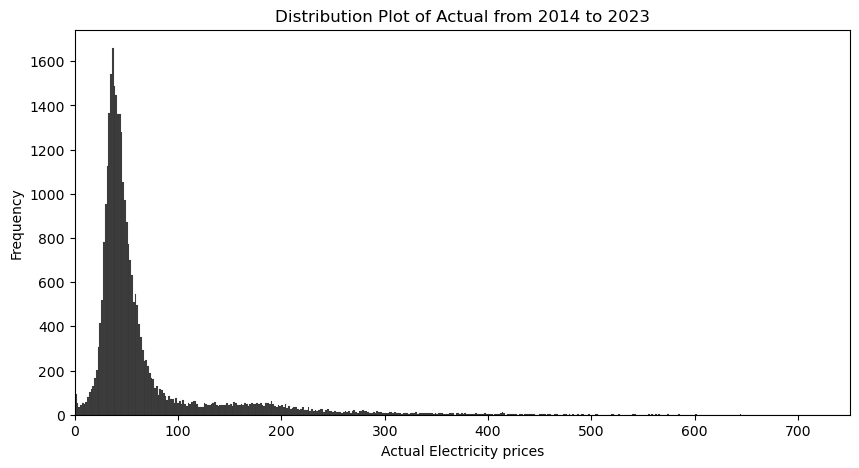

In [18]:
#Plotting distribution of actual values

plt.figure(figsize=(10, 5))
plt.grid(False)
sn.histplot(y_test, color='black')
min_val = 0  
max_val = 750  
plt.xlim(min_val, max_val)
plt.title('Distribution Plot of Actual from 2014 to 2023')
plt.xlabel('Actual Electricity prices')
plt.ylabel('Frequency')
plt.savefig('distribution_plot.png')
plt.show()

In [19]:
# Getting the weights of the first layer
weights_layer1 = model.get_weights()[0]

# Calculating feature importance by summing the absolute weights for each feature
feature_importance = np.sum(np.abs(weights_layer1), axis=0)

# Printing feature importance scores
for i, importance in enumerate(feature_importance):
    print(f'Feature {i+1} Importance: {importance}')

Feature 1 Importance: 5.407279014587402
Feature 2 Importance: 6.507178783416748
Feature 3 Importance: 15.266103744506836
Feature 4 Importance: 6.717276573181152
Feature 5 Importance: 5.665347576141357
Feature 6 Importance: 6.817969799041748
Feature 7 Importance: 6.294311046600342
Feature 8 Importance: 7.211287498474121
Feature 9 Importance: 2.579557180404663


In [20]:
# Calculating the residuals
residuals = y_test - predictions.flatten()

# printing the residuals
print("Residuals:")
print(residuals)

Residuals:
11114     -7.748299
82332     -8.637375
64154     13.383802
32819      1.580883
93871     -7.273178
            ...    
83478      8.784435
16574     -1.456558
6683      -4.026142
109557    -8.573826
91448     -8.767162
Name: Market Index Price (£/MWh), Length: 31468, dtype: float32


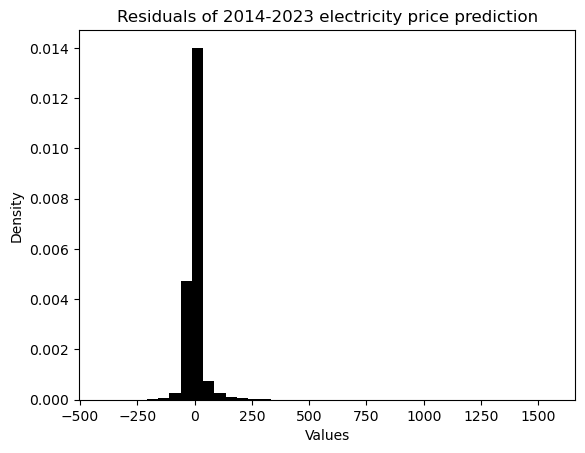

In [21]:
#Displaying the residuals
residuals.plot(kind='hist',  bins=40, density=True,color='black')
plt.grid(False)
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Residuals of 2014-2023 electricity price prediction')

# Displaying the plot
plt.show()

In [22]:
#Creating a new dataframe with both predicted values and actual values

Pred_vs_Actual= pd.DataFrame({'Actual value': y_test, 'Predicted value':predictions1})

In [23]:
#Checking first elements of the dataframe

Pred_vs_Actual.head()

,Actual value,Predicted value
11114,32.750000,40.498299
82332,53.209999,61.847374
64154,43.209999,29.826197
32819,59.549999,57.969116
93871,39.290001,46.563179


In [24]:
#Checking length of dataframe

len(Pred_vs_Actual)

31468

In [25]:
#Creating a column dataframe of time

date_range = pd.date_range('2014-01-01','2023-01-01', freq='30min')

Date=pd.DataFrame(date_range)

In [26]:
#Checking the first elements of the dataframe

Date.head()

,0
0,2014-01-01 00:00:00
1,2014-01-01 00:30:00
2,2014-01-01 01:00:00
3,2014-01-01 01:30:00
4,2014-01-01 02:00:00


In [27]:
#Checking length of dataframe

len(Date)

157777

In [28]:
#Adding the time frame to predicted vs atual dataframe

Pred_vs_Actual['Date'] = Date

In [29]:
#Sorting values by date

Pred_vs_Actualf=Pred_vs_Actual.sort_values(by='Date', ascending=True)

In [30]:
#Checking first elements of the dataframe

Pred_vs_Actualf.head(10)

,Actual value,Predicted value,Date
0,35.320000,43.501034,2014-01-01 00:00:00
4,32.040001,38.166931,2014-01-01 02:00:00
12,22.809999,32.589878,2014-01-01 06:00:00
20,30.080000,38.407166,2014-01-01 10:00:00
24,38.090000,49.103024,2014-01-01 12:00:00
34,66.459999,61.203331,2014-01-01 17:00:00
35,69.309998,57.580971,2014-01-01 17:30:00
42,41.509998,43.207100,2014-01-01 21:00:00
44,37.900002,40.832275,2014-01-01 22:00:00
76,50.639999,50.764351,2014-01-02 14:00:00


In [31]:
#Creating a mask to chack number of null values with the predicted and actual dataframe

masko=Pred_vs_Actualf.isnull()

In [32]:
#Counting the null values and storing the result in a variable

col_o=masko.sum()

In [33]:
#Printing the total of null values within the dataframe

print('number of null values in the pred vs actual dataframe')
print(col_o)

number of null values in the pred vs actual dataframe
Actual value       0
Predicted value    0
Date               0
dtype: int64


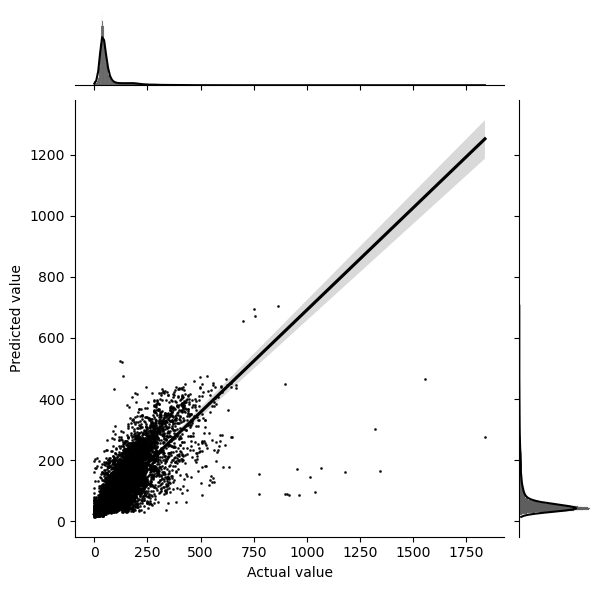

<Figure size 1000x500 with 0 Axes>

In [34]:
#Using seaborn jointplot to plot predictd vs actual form the created datframe. 
sn.jointplot(x=Pred_vs_Actualf['Actual value'],y=Pred_vs_Actualf['Predicted value'], kind='reg',scatter_kws={"s": 1}, color='black')

#Setting figure size
plt.figure(figsize=(10, 5))

# Display the plot
plt.savefig("random.jpg", facecolor="k")
plt.show()